In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('python_cves_component1.csv',parse_dates=["published_ts"])

data.head()

,cve_id,published_ts,cvss3_base_score,problemtype_json,repo_url,repo_name
0,CVE-2008-0252,2008-01-12 02:46:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'CWE...",https://github.com/cherrypy/cherrypy,cherrypy/cherrypy
1,CVE-2024-24156,2024-03-16 06:15:00+00:00,NaN,[{'description': []}],https://github.com/gnuboard/g6,gnuboard/g6
2,CVE-2024-24156,2024-03-16 06:15:00+00:00,NaN,[{'description': []}],https://github.com/gnuboard/g6,gnuboard/g6
3,CVE-2024-24156,2024-03-16 06:15:00+00:00,NaN,[{'description': []}],https://github.com/gnuboard/g6,gnuboard/g6
4,CVE-2024-39097,2024-08-26 15:15:00+00:00,NaN,[{'description': []}],https://github.com/gnuboard/g6,gnuboard/g6


In [5]:
data.columns

Index(['cve_id', 'published_ts', 'cvss3_base_score', 'problemtype_json',
       'repo_url', 'repo_name'],
      dtype='object')

In [6]:
data.shape

(3008, 6)

In [7]:
data["cvss3_base_score"] = pd.to_numeric(data["cvss3_base_score"], errors="coerce")
data["year"] = data["published_ts"].dt.year
data["year"].value_counts().sort_index()

year
2006      1
2007      3
2008      4
2009      2
2010      7
2011     12
2012     64
2013     45
2014    103
2015     43
2016     60
2017    185
2018    158
2019    239
2020    300
2021    330
2022    417
2023    502
2024    533
Name: count, dtype: int64

In [8]:
def cvss_bucket(s):
    if pd.isna(s):
        return "unknown"
    if s < 4: return "low"
    if s < 7: return "medium"
    if s < 9: return "high"
    return "critical"

data["cvss_bucket"] = data["cvss3_base_score"].apply(cvss_bucket)
data["cvss_bucket"].value_counts()


cvss_bucket
medium      971
high        887
unknown     644
critical    449
low          57
Name: count, dtype: int64

In [9]:
for x in data["problemtype_json"].dropna().head(5):
    print(x)
    print("----")


[{'description': [{'lang': 'en', 'value': 'CWE-22'}]}]
----
[{'description': []}]
----
[{'description': []}]
----
[{'description': []}]
----
[{'description': []}]
----


In [10]:
print(data["problemtype_json"].dropna().iloc[0])
print(type(data["problemtype_json"].dropna().iloc[0]))


[{'description': [{'lang': 'en', 'value': 'CWE-22'}]}]
<class 'str'>


In [11]:
import json
import ast  # Python's literal parser

def extract_cwe(row):
    try:
        # Convert Python literal → Python object
        arr = ast.literal_eval(row)   # Handles single quotes safely
        
        if isinstance(arr, list) and len(arr) > 0:
            desc = arr[0].get("description", [])
            if isinstance(desc, list) and len(desc) > 0:
                return desc[0].get("value")
        return None
    except Exception:
        return None

data["cwe"] = data["problemtype_json"].apply(extract_cwe)



In [12]:
data["cwe"].value_counts().head(20)

cwe
CWE-79            306
NVD-CWE-noinfo    184
CWE-22            147
CWE-20            139
CWE-200           122
NVD-CWE-Other      79
CWE-601            77
CWE-287            75
CWE-264            73
CWE-78             65
CWE-94             62
CWE-89             57
CWE-532            50
CWE-400            49
CWE-352            47
CWE-77             44
CWE-1333           44
CWE-770            41
CWE-918            39
CWE-502            35
Name: count, dtype: int64

In [13]:
data["repo_name"].value_counts().head(20)

repo_name
python/cpython           225
django/django            189
ansible/ansible          115
apache/airflow           109
python-pillow/Pillow      81
saltstack/salt            64
zulip/zulip               51
openstack/nova            51
openstack/keystone        44
ikus060/rdiffweb          42
vyperlang/vyper           32
odoo/odoo                 28
frappe/frappe             27
matrix-org/synapse        27
mlflow/mlflow             27
web2py/web2py             23
wagtail/wagtail           21
goauthentik/authentik     20
urllib3/urllib3           19
cobbler/cobbler           19
Name: count, dtype: int64

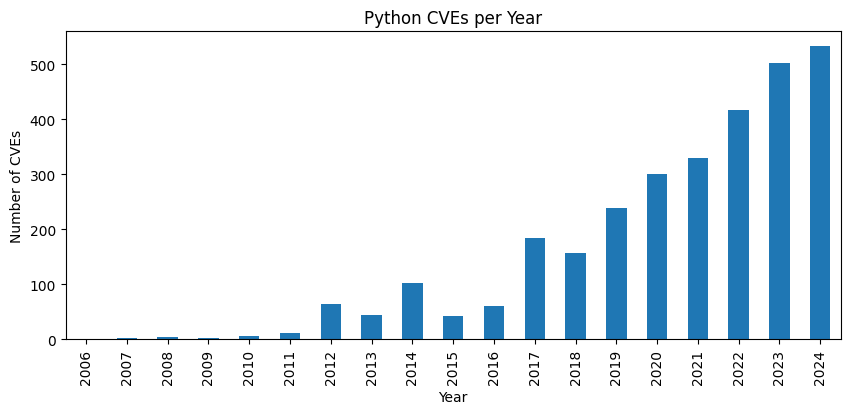

In [14]:
import matplotlib.pyplot as plt

data["year"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
plt.title("Python CVEs per Year")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.show()

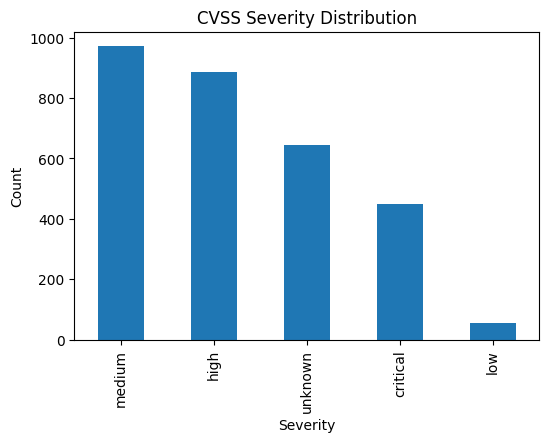

In [15]:
data["cvss_bucket"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("CVSS Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

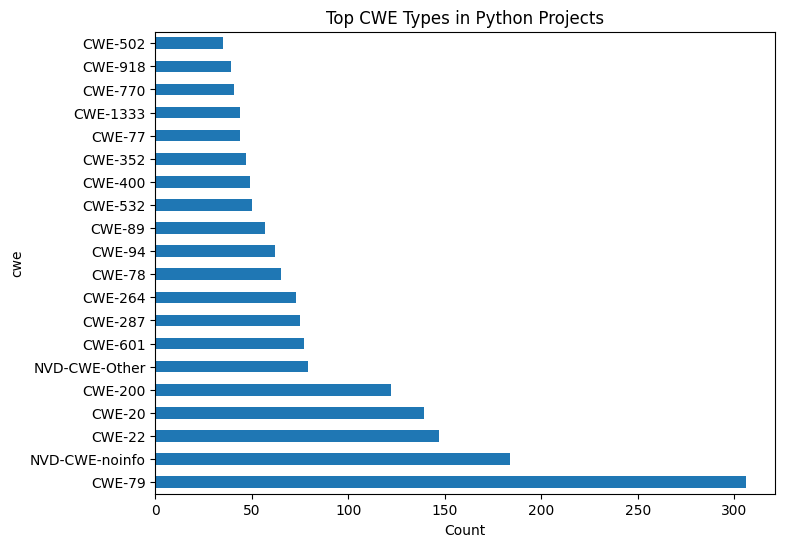

In [17]:
data["cwe"].value_counts().head(20).plot(kind="barh", figsize=(8,6))
plt.title("Top CWE Types in Python Projects")
plt.xlabel("Count")
plt.show()